In [83]:
import numpy as np
import pickle
import json
import tensorflow as tf
# import njson

In [ ]:
import shutil
import keras
model_name = 'blstm_att_word2vec_over'
shutil.unpack_archive(f'{model_name}.zip', f'/content/{model_name}/')
model = keras.models.load_model(f'/content/{model_name}/')

In [168]:
emebdding_layer = model_list.layers[0]
embeddings = model.layers[0].get_weights()[0]

In [100]:
def get_embedding(data, model_type, vector_type, embed_size):
    embed_filename = output_folder_name + data + "_" + model_type + "_" + vector_type + "_" + embed_size + ".pkl"
    vocab_filename = output_folder_name + data + "_" + model_type + "_" + vector_type + "_" + embed_size + "_dict.json"
    reverse_vocab_filename = output_folder_name + data + "_" + model_type + "_" + vector_type + "_" + embed_size + "_reversedict.json"
        
    embedding = np.load(embed_filename, allow_pickle = True)
    
    with open(vocab_filename,"r") as f:
        vocab = json.load(f)
    with open(reverse_vocab_filename,"r") as f:
        reverse_vocab = json.load(f)
    
    data_dict = {
        "data": data,
        "embed": embedding,
        "vocab": vocab,
        "reverse_vocab": reverse_vocab   
    }
        
    return data_dict

In [194]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
    plt.figure(figsize=(14, 14))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
def plot_embedding(embedding, m, n, reverse_dictionary):
    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
    low_dim_embs = tsne.fit_transform(embedding[m:n, :])
    labels = [reverse_dictionary[str(i)] for i in range(m,n)]
    plot_with_labels(low_dim_embs, labels)
    return low_dim_embs

def top_similar(low_dim_embs, mapping, reverse_mapping, valid_words):
#     similarity = tf.matmul(
#           low_dim_embs, low_dim_embs, transpose_b=True)
    #print(similarity)
    with tf.compat.v1.Session() as sess:
        similarity = tf.matmul(low_dim_embs, low_dim_embs, transpose_b=True)

        sim = sess.run(similarity)
    
    for i in range(len(valid_words)):
        if(valid_words[i] in mapping):
            index = mapping[valid_words[i]]
            valid_word = reverse_mapping[str(index)]
            print(len(sim))
            top_k = 10  # number of nearest neighbors
            nearest = (-sim[index, :][:500]).argsort()[1:top_k + 1]
            log_str = 'Nearest to %s:' % valid_word
            for k in range(top_k):
                close_word = reverse_mapping[str(nearest[k])]
                log_str = '%s %s,' % (log_str, close_word)
            print(log_str)

In [195]:
def similar_clusters(data, words, embed_range=[1,500]):
    embedding = data["embed"]
    data_dict = data["vocab"]
    data_reverse_dict = data["reverse_vocab"]
    low_dim_embs = plot_embedding(embedding, embed_range[0], embed_range[1], data_reverse_dict)
    top_similar(low_dim_embs, data_dict, data_reverse_dict, words)

In [199]:
def get_similarityMatrix(low_dim_embs):
    similarity = tf.matmul(
          low_dim_embs, low_dim_embs, transpose_b=True)

    sim = tf.Session().run(similarity)
    return sim

def similarWords(word, sim, mapping, reverse_mapping, top_k):
    index = mapping[word]
    log_str = ''
    try:
        valid_word = reverse_mapping[index]
        nearest = (-sim[index, :][:1000]).argsort()[1:top_k + 1]

        for k in xrange(top_k):
            close_word = reverse_mapping[nearest[k]]
            log_str = '%s%s, ' % (log_str, close_word)
    except:
        print("Word beyond 10k")
    return log_str

def get_tsneembedding(embedding, m, n):
    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
    low_dim_embs = tsne.fit_transform(embedding[m:n, :])
    return low_dim_embs

def comparison(dict_1, dict_2, dict_3, words, top_k):
    for word in words:
        print("Word: " + str(word))
        print(dict_1["data"] + ": " + similarWords(word, get_similarityMatrix(dict_1["embed"]), dict_1["vocab"], dict_1["reverse_vocab"], top_k))
        print(dict_2["data"] + ": " + similarWords(word, get_similarityMatrix(dict_2["embed"]), dict_2["vocab"], dict_2["reverse_vocab"], top_k))
        print(dict_3["data"] + ": " + similarWords(word, get_similarityMatrix(dict_3["embed"]), dict_3["vocab"], dict_3["reverse_vocab"], top_k))       
        print("----------------------------")

In [196]:
data_dict['vocab']['gay']

1157

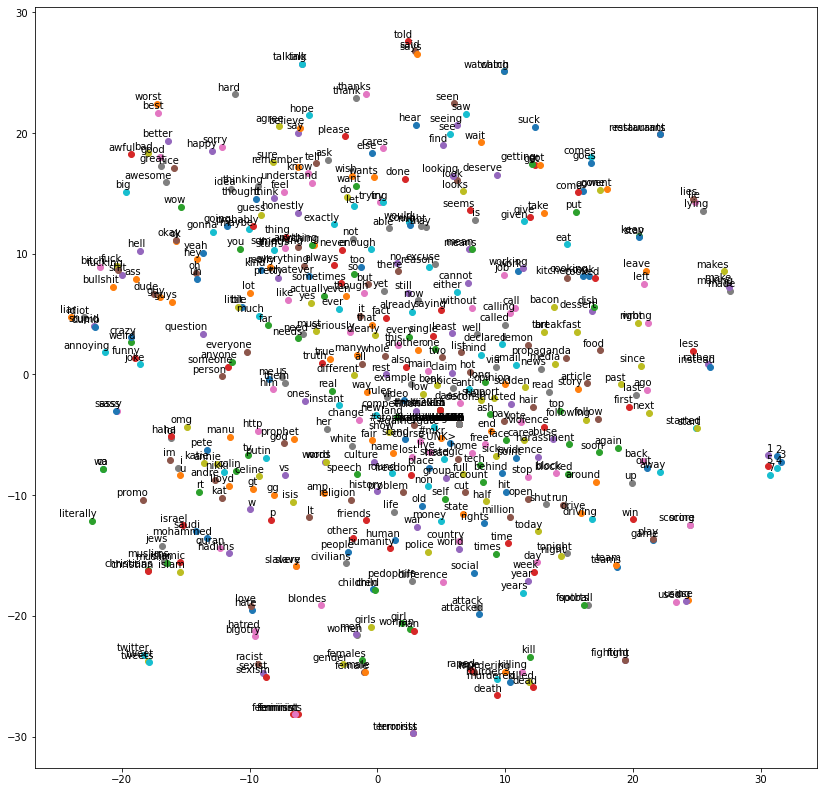

499
Nearest to slave: might, tweet, slave, top, lot, male, girls, know, even, things,


In [197]:
data = "formspring"
model_type = "blstm_attention"
vector_type = "sswe"
embed_size = "50"
output_folder_name = ""

words =  ['slave']

data_dict = get_embedding(data, model_type, vector_type, embed_size)

similar_clusters(get_embedding(data, model_type, vector_type, embed_size), words)

In [88]:
import shutil
import keras
model_name = 'blstm_att_word2vec_over'
shutil.unpack_archive(f'{model_name}.zip', f'/content/{model_name}/')
model = keras.models.load_model(f'/content/{model_name}/')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Ilija\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Ilija\AppData\Local\Temp/ipykernel_8612/605584867.py", line 5, in <module>
    model = keras.models.load_model(f'/content/{model_name}/')
  File "C:\Users\Ilija\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\Ilija\anaconda3\lib\site-packages\keras\saving\save.py", line 214, in load_model
    return saved_model_load.load(filepath, compile, options)
  File "C:\Users\Ilija\anaconda3\lib\site-packages\keras\saving\saved_model\load.py", line 146, in load
    keras_loader.finalize_objects()
  File "C:\Users\Ilija\anaconda3\lib\site-packages\keras\saving\saved_model\load.py", line 663, in finalize_objects
    self._reconstruct_all_models()
  File "C:\Users\Ilija\anaconda3\lib\site-packages\keras

TypeError: object of type 'NoneType' has no len()

In [ ]:
emebdding_layer = model_list.layers[0]
embeddings = model.layers[0].get_weights()[0]